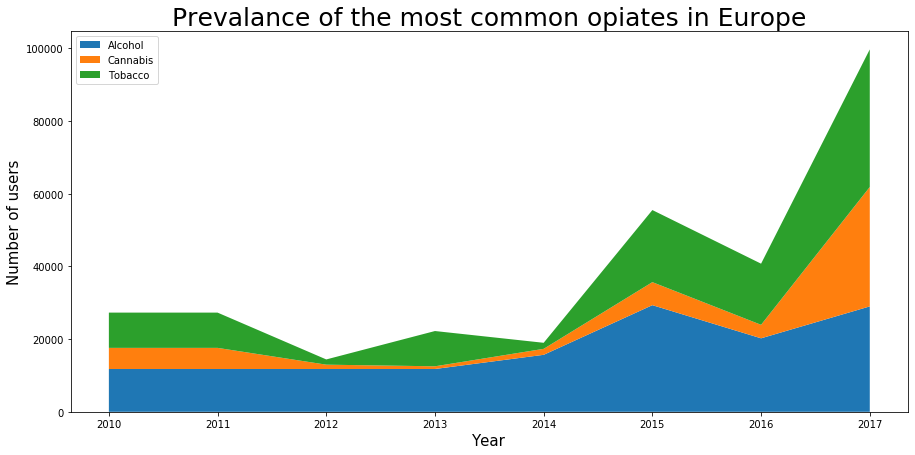

In [19]:
import pandas

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
#pravim tabele za broj koji koriste odredjena droga u 2013-2017
def fali(dic):
    for key,value in dic.items():
        if(value)==0:
            return True
    return False
def missing(dic):
    if(dic):
        vrednosti=np.array([v for v in dic.values()])
        avg=np.sum(vrednosti)/len(vrednosti)
        for key,value in dic.items():
            if value==0:
                dic[key]=avg
def tabela(fajl,tab):
    c=pandas.read_excel(fajl)
    godine=[v for v in tab.keys()]
    for i,row in c.iterrows():
        if not np.isnan(row["Sample size"]) and not np.isnan(row["Year"]) and not np.isnan(row["Total"]) and row["Year"] in godine:
            sample=row["Sample size"]
            tot=row["Total"]/100
            broj=sample*tot
            god=row["Year"]
            tab[int(god)]+=broj
    missing(tab)
    t=[v for v in tab.values()]
    return t
#znam da je spaghetti ali nisam mogao sa for loopom da uradim probao sam
alcohol={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0,2017:0}
amph={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0}
cannabis={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0,2017:0}
cocaine={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0}
lsd={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0}
ecstasy={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0}
tobacco={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0,2017:0}
al=tabela("./tables/prevalance/alcohol.xlsx",alcohol)
am=tabela("./tables/prevalance/amph.xlsx",amph)
can=tabela("./tables/prevalance/cannabis.xlsx",cannabis)
coc=tabela("./tables/prevalance/cocaine.xlsx",cocaine)
ls=tabela("./tables/prevalance/lsd.xlsx",lsd)
ecs=tabela("./tables/prevalance/ecstasy.xlsx",ecstasy)
tob=tabela("./tables/prevalance/tobacco.xlsx",tobacco)
godine=[g for g in range(2010,2018)]
godine2=[g for g in range(2010,2017)]


    
labels=["Alcohol","Cannabis","Tobacco"]
plt.figure(figsize=(15,7))
plt.stackplot(godine, al, can, tob, labels=labels)
plt.legend(loc='upper left')
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of users",fontsize=15)
plt.title("Prevalance of the most common opiates in Europe",fontsize=25)
plt.show()


<Figure size 1080x504 with 0 Axes>

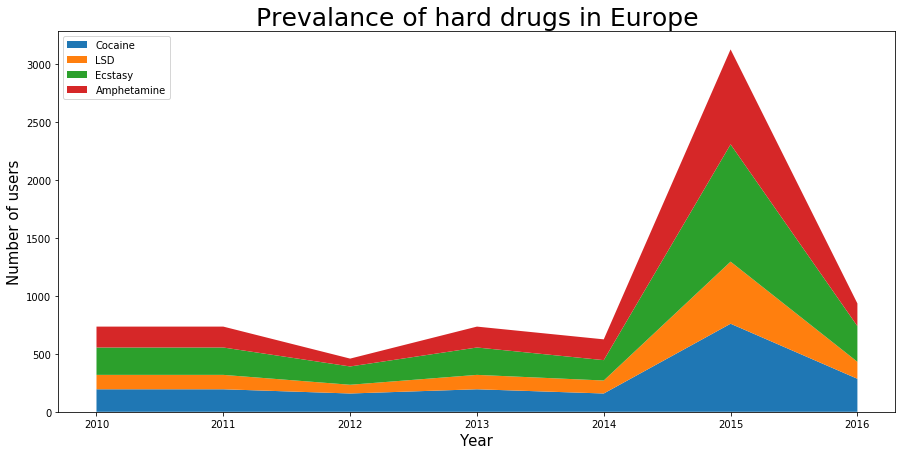

In [20]:
plt.figure(figsize=(15,7))
labels=["Cocaine","LSD","Ecstasy","Amphetamine"]
plt.figure(figsize=(15,7))
plt.stackplot(godine2, coc, ls, ecs,am, labels=labels)
plt.legend(loc='upper left')
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of users",fontsize=15)
plt.title("Prevalance of hard drugs in Europe",fontsize=25)
plt.show()

<Figure size 1080x504 with 0 Axes>

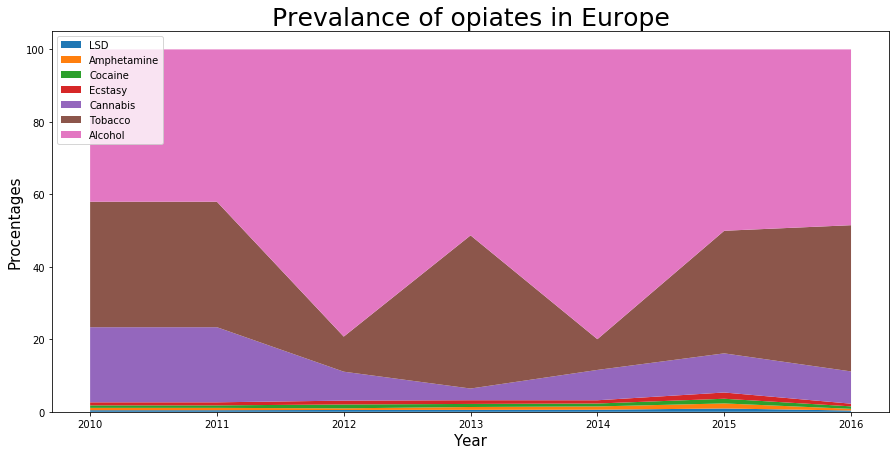

In [57]:
tabele=[alcohol,amph,cannabis,cocaine,lsd,ecstasy,tobacco]
ukupno={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0}
for i in range(2010,2017):
    for tab in tabele:
        ukupno[i]+=tab[i]
alk={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0}
def procenti(tab1,tab2):
    for i in range(2010,2017):
        tab1[i]=(tab2[i]*100)/ukupno[i]
    t=[v for v in tab1.values()]
    return t
di={2010:0,2011:0,2012:0,2013:0,2014:0,2015:0,2016:0}
alk=procenti(di,alcohol)
kan=procenti(di,cannabis)
amf=procenti(di,amph)
koka=procenti(di,cocaine)
eles=procenti(di,lsd)
kser=procenti(di,ecstasy)
duvan=procenti(di,tobacco)

#alk,duvan,kan,kser,koka,amf,eles

plt.figure(figsize=(15,7))
labels=["LSD","Amphetamine","Cocaine","Ecstasy","Cannabis","Tobacco","Alcohol"]
plt.figure(figsize=(15,7))
plt.stackplot(godine2, eles,amf,koka,kser,kan,duvan,alk, labels=labels)
plt.legend(loc='upper left')
plt.xlabel("Year",fontsize=15)
plt.ylabel("Procentages",fontsize=15)
plt.title("Prevalance of opiates in Europe",fontsize=25)
plt.show()    
    